# <p style="text-align: center;"> Machine Learning 101: Predicción de Precios de Alquileres en Madrid
    

<div class="alert alert-success">
    <center>
<b> Práctica Joanybel Ortiz</b> 
    </center>
</div>

In [1]:
# cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

<div class="alert alert-success">
    <center>
<b> Carga de los Datos</b> 
    </center>
</div>

In [2]:
# cargamos fichero
airbnb_df = pd.read_csv("./data/airbnb-listings-extract.csv",sep=';', decimal='.')      
airbnb_df.shape


(14780, 89)

In [3]:
airbnb_df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


<div class="alert alert-success">
    <center>
<b> Limpieza inicial del dataframe</b> 
    </center>
</div>

In [4]:
# Eliminamos las columnas que no aportan nada en este caso como el ID, URLs, descripciones y datos relacionados 
# a la extracción de los datos.
# Algunas descripciones no las eliminaré todavía ya que no conocozco aún el contenido
# Esta eliminación inicial la hago ya que entre menos variables inútiles tengamos mejor será el tiempo de ejecución
# y procesamiento además de simplificar el modelo

In [5]:
airbnb_df = airbnb_df.drop(['ID','Listing Url','Scrape ID','Last Scraped','Name','Summary',
                                'Description','Neighborhood Overview','Notes',
                                'Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url',
                                'Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Since',
                                'Host About','Host Response Time','Host Thumbnail Url','Host Location',
                                'Host Picture Url','Host Response Rate','Street',
                                'Host Verifications','Amenities','Calendar Updated','Calendar last Scraped',
                                'Geolocation','Features'],
                               axis=1)
print(f'El nuevo dataframe tiene: {airbnb_df.shape} filas/columnas')

El nuevo dataframe tiene: (14780, 55) filas/columnas


<div class="alert alert-success">
    <center>
<b> División Train/Test</b> 
    </center>
</div>

In [6]:
#Realizo la división del Dataset.
from sklearn.model_selection import train_test_split

# El 20% de los datos serán para test y el 80% de los datos para training
train, test = train_test_split(airbnb_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Creamos los ficheros csv 
train.to_csv('./data/train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/test.csv', sep=';', decimal='.', index=False)

# Cargamos el dataset de train y trabajamos únicamente con él para hacer el estudio exploratorio
airbnb_train = pd.read_csv('./data/train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 55)
Dimensiones del dataset de test: (2956, 55)


<div class="alert alert-success">
    <center>
<b> Análisis Exploratorio - Train</b> 
    </center>
</div>

In [7]:
airbnb_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Listings Count,11821.0,12.754420,34.578895,0.000000,1.000000,2.000000,6.000000,519.000000
Host Total Listings Count,11821.0,12.754420,34.578895,0.000000,1.000000,2.000000,6.000000,519.000000
Latitude,11824.0,40.491628,4.701030,-37.851182,40.409758,40.419331,40.430778,55.966912
Longitude,11824.0,-3.776863,14.014695,-123.124429,-3.707538,-3.700763,-3.683917,153.371427
Accommodates,11824.0,3.277486,2.093973,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11780.0,1.285229,0.664691,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11804.0,1.344290,0.905180,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11787.0,2.049122,1.623489,1.000000,1.000000,2.000000,2.000000,16.000000
Square Feet,474.0,396.489451,671.125823,0.000000,0.000000,90.000000,624.000000,6997.000000
Price,11809.0,73.712592,71.624844,9.000000,34.000000,55.000000,87.000000,969.000000


In [8]:
#Este es un análisis visual del cuadro anterior. Posteriormente utilizaré otras técnicas para detectar outliers

#Observo que hay outliers en Longitude. Su media es de -3,77 y su máximo es de 153.37, esto quiere decir que 
#Las ubicaciones de los alojamientos no están en la misma región
#Accommodates y Beds parecen tener outlier, analizando es posible que no sea un error ya que el max de Accommodates 
#es 16 y en Beds es 16, sin embargo la media de estas variables es 3 y 2. Este sería un alojamiento que no se acerca
#a la media pero no podemoa afirmar que sea un outlier por tanto seguiremos analizando.
#Bedrooms tiene una media de 1 habiatación y un máximo de 10
#Beds tiene una media de 2 y un máximo de 16
#Square Feet tiene una media de 396 y un máximo de 6997 
#Host Listings Count tiene una media de 12.75 y un máximo de 519 al igual que Host Total Listings Count
#Price tiene una media de 73.71€ y un máximo de 969€
#Extra People tiene una media de 7,63 y un máximo de 500. Esto es un outlier
#Minimum Nights: tiene una media de 3 y un máximo de 1125
#Maximum Nights: tiene una media de 961 noches y un máximo de 1.000.000 noches
#Monthly Price: tiene una media de 1432 y un máximo de 25.000
#Security Deposit: Tiene una media de 189 y un máximo de 900
#Cleaning Fee: Tiene 32 de media y 662 de máximo
#Entre otras Es posible que en algunas variables sea "normal" tener una media muy por debajo del máximo. 
#Por esto seguiré analizando las variables.

#Como este dataset lo conozco, se que el outlier en longitud se debe ha que hay datos de otros países
#Sin embargo la mayoría de los datos pertenecen a alojamientos ubicados en Madrid. Por lo que iniciaré comprobando
#esto y reduciendo el dataset solo a los alojamientos de Madrid ya que de este modo tiene más sentido el cálculo del
#precio en relación al resto de variables.

In [9]:
airbnb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Space                           8718 non-null   object 
 1   Experiences Offered             11824 non-null  object 
 2   Host Acceptance Rate            30 non-null     object 
 3   Host Neighbourhood              8742 non-null   object 
 4   Host Listings Count             11821 non-null  float64
 5   Host Total Listings Count       11821 non-null  float64
 6   Neighbourhood                   7665 non-null   object 
 7   Neighbourhood Cleansed          11824 non-null  object 
 8   Neighbourhood Group Cleansed    11006 non-null  object 
 9   City                            11820 non-null  object 
 10  State                           11705 non-null  object 
 11  Zipcode                         11426 non-null  object 
 12  Market                          

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

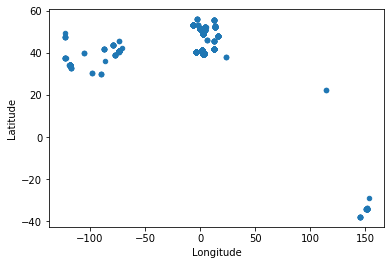

In [10]:
#Comienzo a conocer las variables para determinar cuáles podré usar y cuáles no son relevantes
#Represento los datos de Longitud y latitud para comprobar los outliers
airbnb_train.plot(x='Longitude',y='Latitude', kind = 'scatter')

In [11]:
#Continúo conociendo las variables relacionadas a la ubicación de los alojamientos
set(airbnb_train['Country'])

{'Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Cuba',
 'Denmark',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Ireland',
 'Italy',
 'Netherlands',
 'Spain',
 'Switzerland',
 'United Kingdom',
 'United States',
 nan}

In [12]:
set(airbnb_train['City'])

{'Alaró',
 'Alcudia',
 'Alcúdia',
 'Algaida',
 'Amsterdam',
 'Andratx',
 'Antwerpen',
 'Aravaca (Madrid)',
 'Ariany',
 'Athens',
 'Athina',
 'Austin',
 'Balearic Islands',
 'Ballsbridge',
 'Barcelona',
 'Berlin',
 'Berlín',
 'Betlem',
 'Beverly Hills',
 'Biniamar',
 'Binissalem',
 'Boadilla del Monte',
 'Bondi',
 'Bondi Beach',
 'Bondi Junction',
 'Boston',
 'Brent',
 'Bronx',
 'Brooklyn',
 'Brunswick',
 'Brussel',
 'Bruxelles',
 'Bunyola',
 'Búger',
 'Caimari',
 'Cala Agulla',
 'Cala Anguila-Cala Mendia',
 'Cala Ferrera',
 'Cala Magrana',
 'Cala Murada',
 'Cala Pi',
 'Cala Ratjada',
 'Calvià',
 'Campanet',
 'Campos',
 'Can Pastilla',
 'Can Picafort',
 'Centro',
 'Chelsea, London',
 'Chicago',
 'Chueca',
 'Chueca, Madrid',
 'Clongriffin',
 'Cologny',
 'Colonia Sant Pere',
 'Colònia de Sant Jordi',
 'Copenhagen',
 'Costa dels Pins',
 'Costitx',
 'Darlinghurst',
 'Deià',
 'Delicias',
 'Delicias-Madrid',
 'Denver',
 'Deyá',
 'Dorroughby',
 'Dublin',
 'Edimburgo',
 'Edinburgh',
 'El Toro',

In [13]:
set(airbnb_train['Smart Location'])

{'Alaró, Spain',
 'Alcudia, Spain',
 'Alcúdia, Spain',
 'Algaida, Spain',
 'Amsterdam, Netherlands',
 'Andratx, Spain',
 'Antwerpen, Belgium',
 'Aravaca (Madrid), Spain',
 'Ariany, Spain',
 'Athens, Greece',
 'Athina, Greece',
 'Austin, TX',
 'Balearic Islands, Spain',
 'Ballsbridge, Ireland',
 'Barcelona , Spain',
 'Barcelona, Spain',
 'Berlin, Germany',
 'Berlín, Germany',
 'Betlem, Spain',
 'Beverly Hills, CA',
 'Biniamar, Spain',
 'Binissalem, Spain',
 'Boadilla del Monte, Spain',
 'Bondi Beach, Australia',
 'Bondi Junction, Australia',
 'Bondi, Australia',
 'Boston, MA',
 'Brent, United Kingdom',
 'Bronx, NY',
 'Brooklyn , NY',
 'Brooklyn, NY',
 'Brunswick, Australia',
 'Brussel, Belgium',
 'Bruxelles, Belgium',
 'Bunyola, Spain',
 'Búger, Spain',
 'Caimari, Spain',
 'Cala Agulla, Spain',
 'Cala Anguila-Cala Mendia, Spain',
 'Cala Ferrera, Spain',
 'Cala Magrana, Spain',
 'Cala Murada, Spain',
 'Cala Pi, Spain',
 'Cala Ratjada, Spain',
 'Calvià, Spain',
 'Campanet, Spain',
 'Campo

In [14]:
set(airbnb_train['Market'])

{'Amsterdam',
 'Antwerp',
 'Athens',
 'Austin',
 'Barcelona',
 'Berlin',
 'Boston',
 'Brussels',
 'Byron Bay',
 'Chicago',
 'Copenhagen',
 'D.C.',
 'Deauville',
 'Denver',
 'Dublin',
 'East Bay, CA',
 'Edinburgh',
 'Geneva',
 'Hong Kong',
 'London',
 'Los Angeles',
 'Madrid',
 'Mallorca Island',
 'Manchester',
 'Melbourne',
 'Montreal',
 'Nashville',
 'New Orleans',
 'New York',
 'Other (International)',
 'Paris',
 'Rome',
 'San Diego',
 'San Francisco',
 'Santiago',
 'Seattle',
 'Sydney',
 'Toledo',
 'Toronto',
 'Vancouver',
 'Venice',
 'Vienna',
 nan}

In [15]:
set(airbnb_train['Country Code'])

{'AT',
 'AU',
 'BE',
 'CA',
 'CH',
 'CU',
 'DE',
 'DK',
 'ES',
 'FR',
 'GB',
 'GR',
 'HK',
 'IE',
 'IT',
 'It',
 'NL',
 'US'}

In [16]:
set(airbnb_train['Experiences Offered'])

{'business', 'family', 'none', 'romantic', 'social'}

In [17]:
#Como ya hemos estudiado este dataset, sé que la mayoría de sus alojamientos están en Madrid
#Lo compruebo y me quedo solo con estos
print('Total de alojamientos del dataset: ',airbnb_train.shape[0])
airbnb_train = airbnb_train[airbnb_train['City']=='Madrid']
print('Total de alojamientos en Madrid: ',airbnb_train.shape[0])


#Elimino las siguientes variables ya que solo usaré los alojamientos de Madrid 
#Elimino Neighbourhood y Neighbourhood Group Cleansed y me quedo con Neighbourhood Cleansed que no tiene nulls
airbnb_train = airbnb_train.drop(['City', 'State', 'Country Code', 'Country', 'Market', 'Smart Location', 
                            'Neighbourhood', 'Neighbourhood Group Cleansed'], axis=1)
airbnb_train.head().T

Total de alojamientos del dataset:  11824
Total de alojamientos en Madrid:  10567


,0,1,2,3,4
Space,"Un piso muy cómodo en Jerónimos, una de las zo...",El apartamento dispone de un dormitorio indepe...,NaN,NaN,We are a young couple; David (Spain) and Ana (...
Experiences Offered,none,none,none,none,none
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Neighbourhood,Jerónimos,NaN,Carabanchel,Justicia,Gaztambide
Host Listings Count,2.0,1.0,16.0,114.0,2.0
Host Total Listings Count,2.0,1.0,16.0,114.0,2.0
Neighbourhood Cleansed,Jerónimos,Sol,Vista Alegre,Embajadores,Gaztambide
Zipcode,28014,28012,28025,28012,28015
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.70534,-3.740374,-3.703052,-3.713716


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

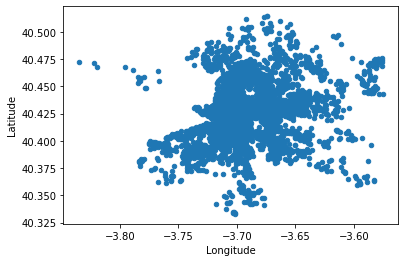

In [18]:
#Represento los datos de Longitud y latitud para mostrar los alojqamientos de Madrid
airbnb_train.plot(x='Longitude',y='Latitude', kind = 'scatter')

In [19]:
#Observo que aún hay muchas variables que contienen texto:
airbnb_train.describe(exclude=[np.number]).T

,count,unique,top,freq
Space,7730,7252,Los Apartamentos Good Stay Prado se encuentran...,22
Experiences Offered,10567,1,none,10567
Host Acceptance Rate,0,0,NaN,NaN
Host Neighbourhood,7998,104,Malasaña,786
Neighbourhood Cleansed,10567,125,Embajadores,1479
Zipcode,10220,68,28012,1660
Property Type,10567,20,Apartment,8741
Room Type,10567,3,Entire home/apt,6333
Bed Type,10567,5,Real Bed,10335
Has Availability,0,0,NaN,NaN


In [20]:
#Conozco los datos que contienen las variables con texto
set(airbnb_train['Neighbourhood Cleansed'])

{'Abrantes',
 'Acacias',
 'Adelfas',
 'Aeropuerto',
 'Aguilas',
 'Alameda de Osuna',
 'Almagro',
 'Almenara',
 'Almendrales',
 'Aluche',
 'Ambroz',
 'Amposta',
 'Apostol Santiago',
 'Arapiles',
 'Aravaca',
 'Arcos',
 'Argüelles',
 'Atocha',
 'Bellas Vistas',
 'Berruguete',
 'Buenavista',
 'Butarque',
 'Campamento',
 'Canillas',
 'Canillejas',
 'Casa de Campo',
 'Casco Histórico de Barajas',
 'Casco Histórico de Vallecas',
 'Casco Histórico de Vicálvaro',
 'Castellana',
 'Castilla',
 'Castillejos',
 'Chopera',
 'Ciudad Jardín',
 'Ciudad Universitaria',
 'Colina',
 'Comillas',
 'Concepción',
 'Corralejos',
 'Cortes',
 'Costillares',
 'Cuatro Caminos',
 'Cuatro Vientos',
 'Cármenes',
 'Delicias',
 'El Goloso',
 'El Plantío',
 'El Viso',
 'Embajadores',
 'Entrevías',
 'Estrella',
 'Fontarrón',
 'Fuente del Berro',
 'Fuentelareina',
 'Gaztambide',
 'Goya',
 'Guindalera',
 'Hellín',
 'Hispanoamérica',
 'Ibiza',
 'Imperial',
 'Jerónimos',
 'Justicia',
 'La Paz',
 'Legazpi',
 'Lista',
 'Los An

In [21]:
set(airbnb_train['Property Type'])

{'Apartment',
 'Bed & Breakfast',
 'Boutique hotel',
 'Bungalow',
 'Camper/RV',
 'Casa particular',
 'Chalet',
 'Condominium',
 'Dorm',
 'Earth House',
 'Guest suite',
 'Guesthouse',
 'Hostel',
 'House',
 'Loft',
 'Other',
 'Serviced apartment',
 'Tent',
 'Townhouse',
 'Villa'}

In [22]:
set(airbnb_train['Room Type'])

{'Entire home/apt', 'Private room', 'Shared room'}

In [23]:
set(airbnb_train['Cancellation Policy'])

{'flexible', 'moderate', 'strict', 'super_strict_30', 'super_strict_60'}

In [24]:
set(airbnb_train['Bed Type'])

{'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed'}

<div class="alert alert-success">
    <center>
<b> Categorización de las variables a numéricas</b> 
    </center>
</div>

In [25]:
# Utilizaré Encoder ya que las variables categóricas de este Dataframe no precisan un orden 
# Eliminaré las variables categóricas que considere innecesarias
Variables_Categoricas = ['Neighbourhood Cleansed','Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']

mean_m = {}
for i in Variables_Categoricas:
    mean = airbnb_train.groupby(i)['Price'].mean()
    airbnb_train[i] = airbnb_train[i].map(mean)
    mean_m[i] = mean

In [26]:
set(airbnb_train['Zipcode'])

{'-',
 '20013',
 '20126',
 '2015',
 '25008',
 '27013',
 '28001',
 '28002',
 '28003',
 '28004',
 '28005',
 '28006',
 '28007',
 '28008',
 '28009',
 '28010',
 '28011',
 '28012',
 '28013',
 '28014',
 '28015',
 '28016',
 '28017',
 '28018',
 '28019',
 '28020',
 '28021',
 '28022',
 '28023',
 '28024',
 '28025',
 '28026',
 '28027',
 '28028',
 '28029',
 '28030',
 '28031',
 '28032',
 '28033',
 '28034',
 '28035',
 '28036',
 '28037',
 '28038',
 '28039',
 '2804',
 '28040',
 '28041',
 '28042',
 '28043',
 '28044',
 '28045',
 '28046',
 '28047',
 '28049',
 '28050',
 '28051',
 '28051\n28051',
 '28052',
 '28053',
 '28054',
 '28055',
 '28056',
 '28058',
 '28060',
 '2815',
 '28850',
 'Madrid 28004',
 nan}

In [27]:
#Elimino las siguientes variables: Square feet ya que el 95,9% de los datos que contiene son Nulos
#Weekly Price ya que el 75,6% de los datos que contiene son Nulos 
#Monthly Price ya que el 75,7% de los datos que contiene son Nulos 
#Host Acceptance Rate ya que el 99,7% de los datos que contiene son Nulos 
# Zipcode ya que contiene nulos, NAs y errores además que con Neighbourhood Cleansed podré puedo conocer los barrios
# Y el resto de variables que no son relevantes
airbnb_train = airbnb_train.drop(['Experiences Offered','Space', 'Host Acceptance Rate', 'Host Neighbourhood', 'Has Availability', 'First Review',
                            'Last Review', 'Host Listings Count', 'Host Total Listings Count','License', 
                            'Weekly Price','Monthly Price', 'Jurisdiction Names','Maximum Nights', 
                            'Reviews per Month','Minimum Nights', 'Extra People',
                            'Calculated host listings count', 'Zipcode', 'Square Feet'], axis=1)
airbnb_train.head().T

,0,1,2,3,4
Neighbourhood Cleansed,104.600000,85.822309,37.074074,60.705683,56.000000
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.705340,-3.740374,-3.703052,-3.713716
Property Type,67.744849,67.744849,67.744849,67.744849,67.744849
Room Type,87.633318,87.633318,30.129252,34.262913,34.262913
Accommodates,4.000000,4.000000,1.000000,2.000000,2.000000
Bathrooms,1.000000,1.000000,1.500000,3.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,1.000000,1.000000
Beds,2.000000,2.000000,8.000000,1.000000,1.000000
Bed Type,66.459669,66.459669,66.459669,66.459669,66.459669


In [28]:
print(f'El dataframe tiene: {airbnb_train.shape} filas/columnas')

El dataframe tiene: (10567, 27) filas/columnas


In [29]:
airbnb_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10567 entries, 0 to 11823
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Neighbourhood Cleansed       10567 non-null  float64
 1   Latitude                     10567 non-null  float64
 2   Longitude                    10567 non-null  float64
 3   Property Type                10567 non-null  float64
 4   Room Type                    10567 non-null  float64
 5   Accommodates                 10567 non-null  int64  
 6   Bathrooms                    10527 non-null  float64
 7   Bedrooms                     10549 non-null  float64
 8   Beds                         10530 non-null  float64
 9   Bed Type                     10567 non-null  float64
 10  Price                        10559 non-null  float64
 11  Security Deposit             4549 non-null   float64
 12  Cleaning Fee                 6282 non-null   float64
 13  Guests Included 

<div class="alert alert-success">
    <center>
<b> Histogramas para conocer el comportamiento de los datos y detectar outliers</b> 
    </center>
</div>

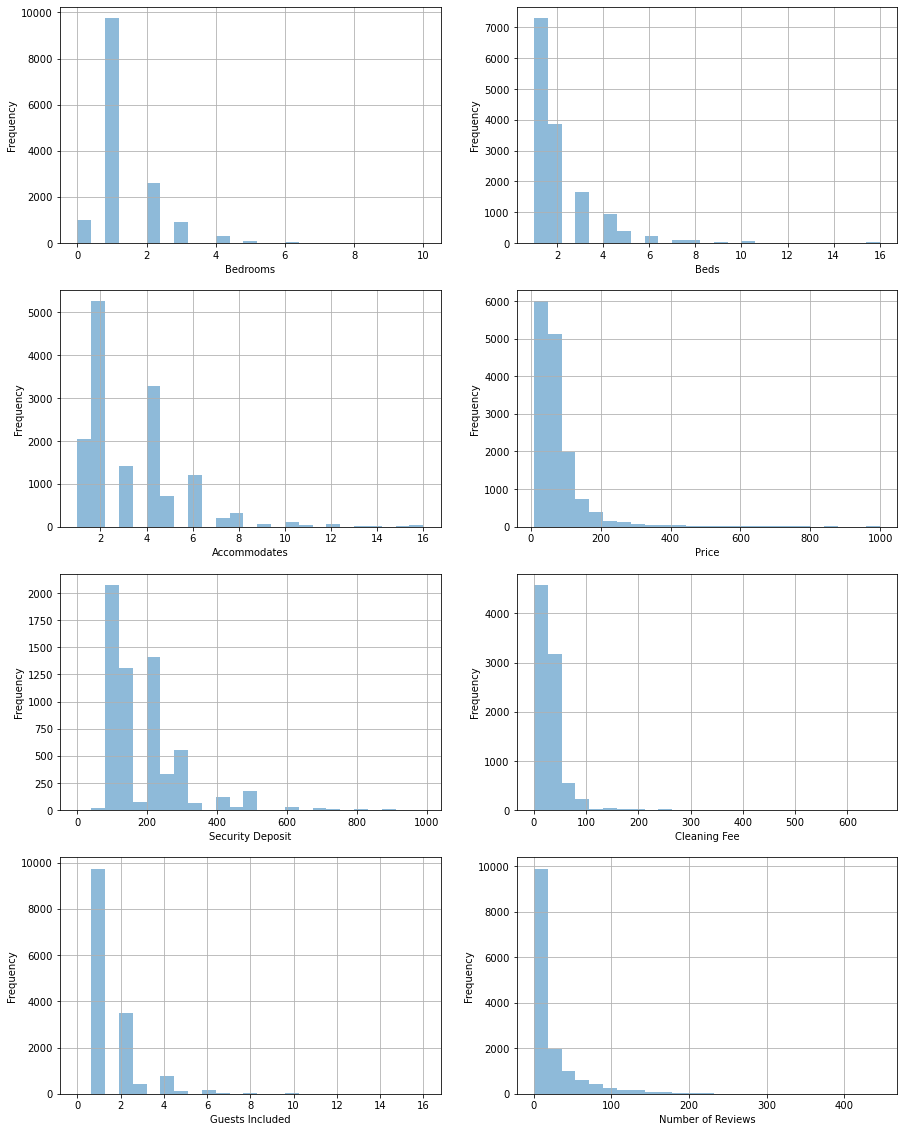

In [30]:
#Para continuar analizando y entendiendo los datos vamos a representar los histogramas de los atributos
plt.figure(figsize=(15, 20))

plt.subplot(4,2,1)
airbnb_df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.subplot(4,2,2)
airbnb_df['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Beds')

plt.subplot(4,2,3)
airbnb_df['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

plt.subplot(4,2,4)
airbnb_df['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.subplot(4,2,5)
airbnb_df['Security Deposit'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Security Deposit')

plt.subplot(4,2,6)
airbnb_df['Cleaning Fee'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Cleaning Fee')

plt.subplot(4,2,7)
airbnb_df['Guests Included'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Guests Included')

plt.subplot(4,2,8)
airbnb_df['Number of Reviews'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Number of Reviews')


plt.show()

In [31]:
#Como podemos observar parece que si tenemos outliers en las variables anteriormente mencionadas cuando realizamos
#el describe. A simple vista podemos decir que:
#Bedrooms tiene outliers después de 6
#Beds después de 9
#Accomodates después de 10
#Price después de 350
#Security Deposit después de 500
#Cleaning Fee después de 150
#Guests Included después de 6
#Number of Reviews después de 180


#Sin embargo seguiré observando las variables para estar segura de que son outliers

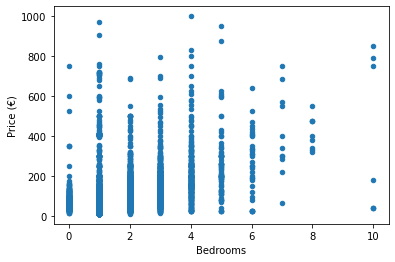

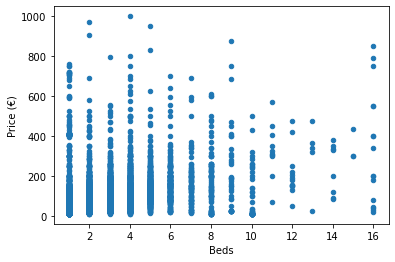

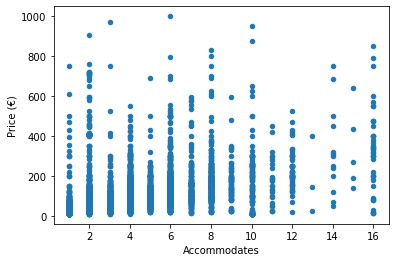

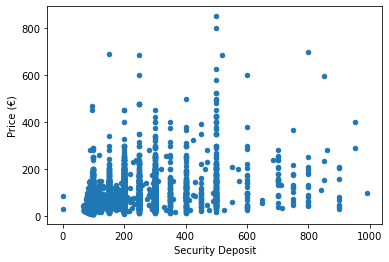

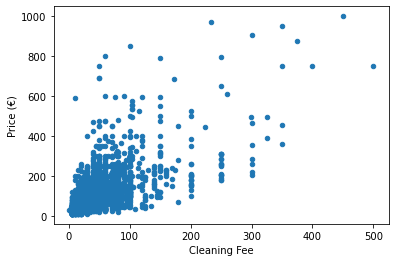

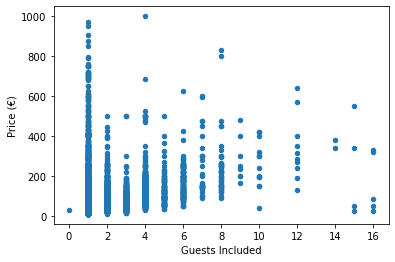

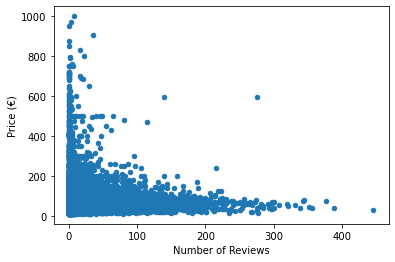

In [32]:
#Representamos de nuevo los datos para ver los outliers 
airbnb_df.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price (€)')
plt.show()

airbnb_df.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('Beds')
plt.ylabel('Price (€)')
plt.show()

airbnb_df.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('Price (€)')


airbnb_df.plot(kind = 'scatter',x='Security Deposit',y = 'Price')
plt.xlabel('Security Deposit')
plt.ylabel('Price (€)')

airbnb_df.plot(kind = 'scatter',x='Cleaning Fee',y = 'Price')
plt.xlabel('Cleaning Fee')
plt.ylabel('Price (€)')

airbnb_df.plot(kind = 'scatter',x='Guests Included',y = 'Price')
plt.xlabel('Guests Included')
plt.ylabel('Price (€)')

airbnb_df.plot(kind = 'scatter',x='Number of Reviews',y = 'Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (€)')



plt.show()

<div class="alert alert-success">
    <center>
<b> Filtros</b> 
    </center>
</div>

Vamos a crear filtros para eliminar los outliers

In [33]:
airbnb_train['Bedrooms'].value_counts()

1.0     7123
2.0     1856
0.0      751
3.0      585
4.0      159
5.0       48
6.0       14
10.0       5
8.0        4
7.0        4
Name: Bedrooms, dtype: int64

In [34]:
airbnb_train_2 = airbnb_train[airbnb_train['Bedrooms'] <= 6]

In [35]:
airbnb_train_2['Bedrooms'].value_counts()

1.0    7123
2.0    1856
0.0     751
3.0     585
4.0     159
5.0      48
6.0      14
Name: Bedrooms, dtype: int64

In [36]:
#Cálculo de los registros que estoy "perdiendo"/filtrando
print(f'Original: {airbnb_train.shape[0]}\nFiltered: {airbnb_train_2.shape[0]}')
print(f'Diferencia: {(airbnb_train.shape[0] - airbnb_train_2.shape[0])/airbnb_train.shape[0]*100}%')

Original: 10567
Filtered: 10536
Diferencia: 0.29336613986940474%


In [37]:
airbnb_train_2['Beds'].value_counts()

1.0     5264
2.0     2847
3.0     1175
4.0      635
5.0      254
6.0      142
7.0       59
8.0       53
10.0      34
9.0       24
12.0       6
16.0       6
11.0       4
14.0       3
13.0       2
Name: Beds, dtype: int64

In [38]:
airbnb_train_3 = airbnb_train_2[airbnb_train_2['Beds'] <= 9]

In [39]:
airbnb_train_3['Beds'].value_counts()

1.0    5264
2.0    2847
3.0    1175
4.0     635
5.0     254
6.0     142
7.0      59
8.0      53
9.0      24
Name: Beds, dtype: int64

In [40]:
#Cálculo de los registros que estoy "perdiendo"/filtrando
print(f'Original: {airbnb_train_2.shape[0]}\nFiltered: {airbnb_train_3.shape[0]}')
print(f'Diferencia: {(airbnb_train_2.shape[0] - airbnb_train_3.shape[0])/airbnb_train_2.shape[0]*100}%')

Original: 10536
Filtered: 10453
Diferencia: 0.7877752467729688%


In [41]:
airbnb_train_3['Accommodates'].value_counts()

2     3760
4     2369
1     1524
3     1043
6      795
5      498
8      193
7      140
10      52
9       40
12      23
11      10
16       3
13       2
14       1
Name: Accommodates, dtype: int64

In [42]:
airbnb_train_4 = airbnb_train_3[airbnb_train_3['Accommodates'] <= 12]

In [43]:
airbnb_train_4['Accommodates'].value_counts()

2     3760
4     2369
1     1524
3     1043
6      795
5      498
8      193
7      140
10      52
9       40
12      23
11      10
Name: Accommodates, dtype: int64

In [44]:
#Cálculo de los registros que estoy "perdiendo"/filtrando
print(f'Original: {airbnb_train_3.shape[0]}\nFiltered: {airbnb_train_4.shape[0]}')
print(f'Diferencia: {(airbnb_train_3.shape[0] - airbnb_train_4.shape[0])/airbnb_train_3.shape[0]*100}%')

Original: 10453
Filtered: 10447
Diferencia: 0.057399789534105045%


In [45]:
airbnb_train_4['Cleaning Fee'].value_counts()

30.0     1043
20.0      921
10.0      634
15.0      549
25.0      539
         ... 
73.0        1
41.0        1
110.0       1
94.0        1
375.0       1
Name: Cleaning Fee, Length: 82, dtype: int64

In [46]:
#Había filtrado esta variable pero me elimina muchísimos registros
#Un 40% por lo que no la aplicaré
#airbnb_train_5 = airbnb_train_4[airbnb_train_4['Cleaning Fee'] <= 400]

In [47]:
airbnb_train_4['Guests Included'].value_counts()

1     6835
2     2540
4      544
3      331
6       92
5       69
7       18
8       15
16       1
10       1
15       1
Name: Guests Included, dtype: int64

In [48]:
airbnb_train_5 = airbnb_train_4[airbnb_train_4['Guests Included'] <= 8]

In [49]:
airbnb_train_5['Guests Included'].value_counts()

1    6835
2    2540
4     544
3     331
6      92
5      69
7      18
8      15
Name: Guests Included, dtype: int64

In [50]:
#Cálculo de los registros que estoy "perdiendo"/filtrando
print(f'Original: {airbnb_train_4.shape[0]}\nFiltered: {airbnb_train_5.shape[0]}')
print(f'Diferencia: {(airbnb_train_4.shape[0] - airbnb_train_5.shape[0])/airbnb_train_4.shape[0]*100}%')

Original: 10447
Filtered: 10444
Diferencia: 0.02871637790753326%


In [51]:
airbnb_train_5['Number of Reviews'].value_counts()
#Seguimos analizando

0      2139
1       861
2       546
3       437
4       382
       ... 
190       1
214       1
222       1
294       1
343       1
Name: Number of Reviews, Length: 242, dtype: int64

In [52]:
airbnb_train_6 = airbnb_train_5[airbnb_train_5['Price'] >=12 & (airbnb_train_5['Price'] <= 800)]

In [53]:
#Cálculo de los registros que estoy "perdiendo"/filtrando
print(f'Original: {airbnb_train_5.shape[0]}\nFiltered: {airbnb_train_6.shape[0]}')
print(f'Diferencia: {(airbnb_train_5.shape[0] - airbnb_train_6.shape[0])/airbnb_train_5.shape[0]*100}%')

Original: 10444
Filtered: 10437
Diferencia: 0.06702412868632708%


In [54]:
#Creo esta variable porque antes estaba usando airbnb_train_f hasta que me di cuenta que estaba sobreescribiendo
#la variable y por eso no veía correctamente los filtros. Al crear esta variable no tengo que modificar todo lo que
#sigue
airbnb_train_f = airbnb_train_6 

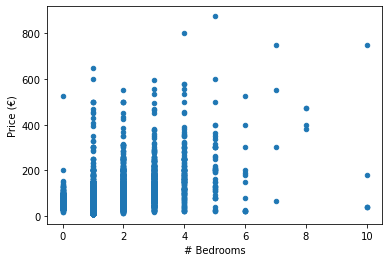

In [55]:
#Comparativa Bedrooms
airbnb_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price (€)')
plt.show()

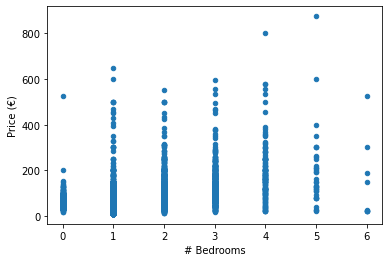

In [56]:
airbnb_train_f.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price (€)')
plt.show()

Text(0, 0.5, 'Price (€)')

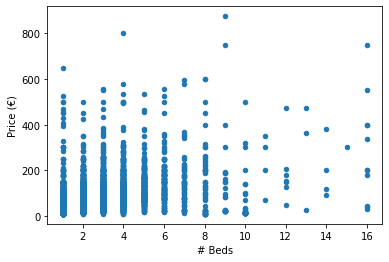

In [57]:
#Comparativa Beds
airbnb_train.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('# Beds')
plt.ylabel('Price (€)')


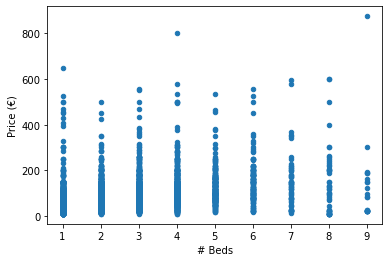

In [58]:
airbnb_train_f.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('# Beds')
plt.ylabel('Price (€)')
plt.show()

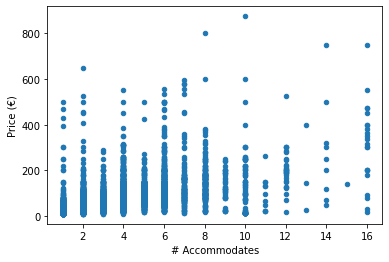

In [59]:
#Comparativa Accommodates
airbnb_train.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('# Accommodates')
plt.ylabel('Price (€)')
plt.show()

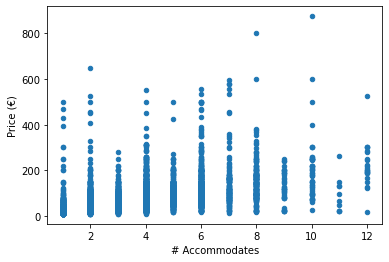

In [60]:
airbnb_train_f.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('# Accommodates')
plt.ylabel('Price (€)')
plt.show()

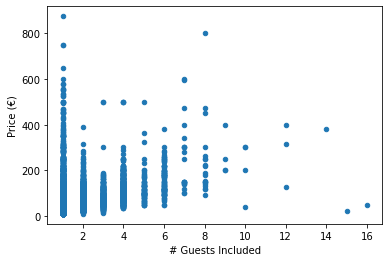

In [61]:
#Comparativa Guests Included
airbnb_train.plot(kind = 'scatter',x='Guests Included',y = 'Price')
plt.xlabel('# Guests Included')
plt.ylabel('Price (€)')
plt.show()

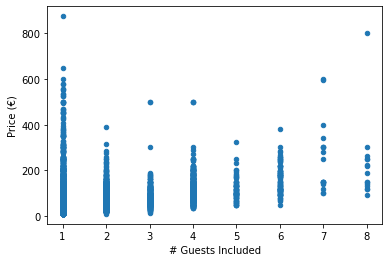

In [62]:
airbnb_train_f.plot(kind = 'scatter',x='Guests Included',y = 'Price')
plt.xlabel('# Guests Included')
plt.ylabel('Price (€)')
plt.show()

<div class="alert alert-success">
    <center>
<b> Missing</b> 
    </center>
</div>

In [63]:
missing=airbnb_train_f.isnull().sum()
missing[missing>0]

Bathrooms                        21
Security Deposit               5939
Cleaning Fee                   4218
Review Scores Rating           2240
Review Scores Accuracy         2256
Review Scores Cleanliness      2251
Review Scores Checkin          2262
Review Scores Communication    2252
Review Scores Location         2265
Review Scores Value            2264
dtype: int64

In [64]:
#Podemos ver que tenemos algunas variables con un alto porcentage de missings. 
#Eliminaré la variable Security Deposit ya que no tiene demasiado sentido mantenerla e imputarle un valor.

In [65]:
airbnb_train_f = airbnb_train_f.drop(['Security Deposit'],axis=1)

In [66]:
airbnb_train_f['Bathrooms'].fillna(airbnb_train_f['Bathrooms'].mean(),inplace=True)
airbnb_train_f['Bedrooms'].fillna(airbnb_train_f['Bedrooms'].mean(), inplace=True)
airbnb_train_f['Beds'].fillna(airbnb_train_f['Beds'].mean(), inplace=True)
airbnb_train_f['Price'].fillna(airbnb_train_f['Price'].mean(), inplace=True)
#Los valores nulos de 'Cleaning Fee' se sustituyen por el valor 0
airbnb_train_f['Cleaning Fee'].fillna(0, inplace=True)
airbnb_train_f['Review Scores Rating'].fillna((airbnb_train_f['Review Scores Rating'].mean()), inplace=True)
airbnb_train_f['Review Scores Accuracy'].fillna((airbnb_train_f['Review Scores Accuracy'].mean()), inplace=True)
airbnb_train_f['Review Scores Cleanliness'].fillna((airbnb_train_f['Review Scores Cleanliness'].mean()), inplace=True)
airbnb_train_f['Review Scores Checkin'].fillna((airbnb_train_f['Review Scores Checkin'].mean()), inplace=True)
airbnb_train_f['Review Scores Communication'].fillna((airbnb_train_f['Review Scores Communication'].mean()), inplace=True)
airbnb_train_f['Review Scores Location'].fillna((airbnb_train_f['Review Scores Location'].mean()), inplace=True)
airbnb_train_f['Review Scores Value'].fillna((airbnb_train_f['Review Scores Value'].mean()), inplace=True)
missing=airbnb_train_f.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

In [67]:
airbnb_train_f.isna().sum()

Neighbourhood Cleansed         0
Latitude                       0
Longitude                      0
Property Type                  0
Room Type                      0
Accommodates                   0
Bathrooms                      0
Bedrooms                       0
Beds                           0
Bed Type                       0
Price                          0
Cleaning Fee                   0
Guests Included                0
Availability 30                0
Availability 60                0
Availability 90                0
Availability 365               0
Number of Reviews              0
Review Scores Rating           0
Review Scores Accuracy         0
Review Scores Cleanliness      0
Review Scores Checkin          0
Review Scores Communication    0
Review Scores Location         0
Review Scores Value            0
Cancellation Policy            0
dtype: int64

(array([8.725e+03, 1.385e+03, 2.240e+02, 5.300e+01, 1.700e+01, 2.000e+01,
        1.000e+01, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([  9. ,  95.6, 182.2, 268.8, 355.4, 442. , 528.6, 615.2, 701.8,
        788.4, 875. ]),
 <BarContainer object of 10 artists>)

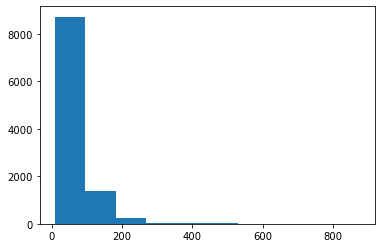

In [68]:
plt.hist(airbnb_train_f['Price'])

<AxesSubplot:xlabel='Price', ylabel='Price'>

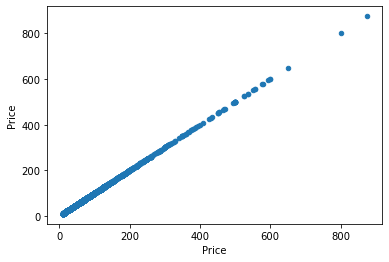

In [69]:
airbnb_train_f.plot(kind = 'scatter',x='Price',y = 'Price')

<div class="alert alert-success">
    <center>
<b> Matriz de Correlación</b> 
    </center>
</div>

In [70]:
airbnb_train_f.corr() 

,Neighbourhood Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,...,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
Neighbourhood Cleansed,1.000000,0.198700,-0.087537,0.056022,0.243924,0.181175,0.144709,0.055715,0.110805,-0.010566,...,0.008297,0.082339,0.018999,0.013474,0.030106,-0.002368,-0.006931,0.338033,0.013958,0.160478
Latitude,0.198700,1.000000,0.260164,-0.014511,0.011600,-0.001455,0.030504,0.025803,0.013426,0.007865,...,0.026265,-0.058492,-0.001462,0.001930,-0.007336,0.008717,0.004806,0.046134,-0.008084,-0.028713
Longitude,-0.087537,0.260164,1.000000,-0.017965,-0.075113,-0.049694,0.006561,0.012804,-0.017648,0.007267,...,0.001812,-0.039184,0.021886,0.024274,0.024134,0.017167,0.015021,-0.085138,0.018220,-0.057050
Property Type,0.056022,-0.014511,-0.017965,1.000000,0.263388,0.114489,-0.026262,0.031891,0.050004,-0.004315,...,-0.031130,0.019480,-0.012122,0.002787,-0.004414,-0.000073,0.007516,0.017081,-0.005607,0.062891
Room Type,0.243924,0.011600,-0.075113,0.263388,1.000000,0.572259,-0.026761,0.253424,0.364956,-0.016486,...,-0.006108,0.136004,-0.020952,0.010369,0.026391,-0.009218,0.012627,0.078950,-0.028811,0.183406
Accommodates,0.181175,-0.001455,-0.049694,0.114489,0.572259,1.000000,0.282704,0.679232,0.806081,0.035756,...,0.072905,0.095958,-0.039838,-0.030505,-0.004665,-0.053587,-0.037689,0.033492,-0.043229,0.201164
Bathrooms,0.144709,0.030504,0.006561,-0.026262,-0.026761,0.282704,1.000000,0.383479,0.320363,0.040955,...,-0.005453,-0.059180,0.007057,0.007305,0.005085,-0.034878,-0.033937,0.035366,-0.000715,0.139679
Bedrooms,0.055715,0.025803,0.012804,0.031891,0.253424,0.679232,0.383479,1.000000,0.694800,0.067166,...,0.013596,-0.027035,0.012947,0.010041,0.012783,-0.014588,0.003629,-0.006809,-0.000664,0.081590
Beds,0.110805,0.013426,-0.017648,0.050004,0.364956,0.806081,0.320363,0.694800,1.000000,0.058660,...,0.079244,0.048704,-0.031307,-0.033989,-0.001126,-0.036222,-0.020030,-0.004888,-0.033091,0.132098
Bed Type,-0.010566,0.007865,0.007267,-0.004315,-0.016486,0.035756,0.040955,0.067166,0.058660,1.000000,...,0.020130,-0.002512,0.002952,0.006632,0.006946,0.007564,-0.000803,-0.012984,0.006195,-0.005025


<ipython-input-71-e724ef7e3772>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


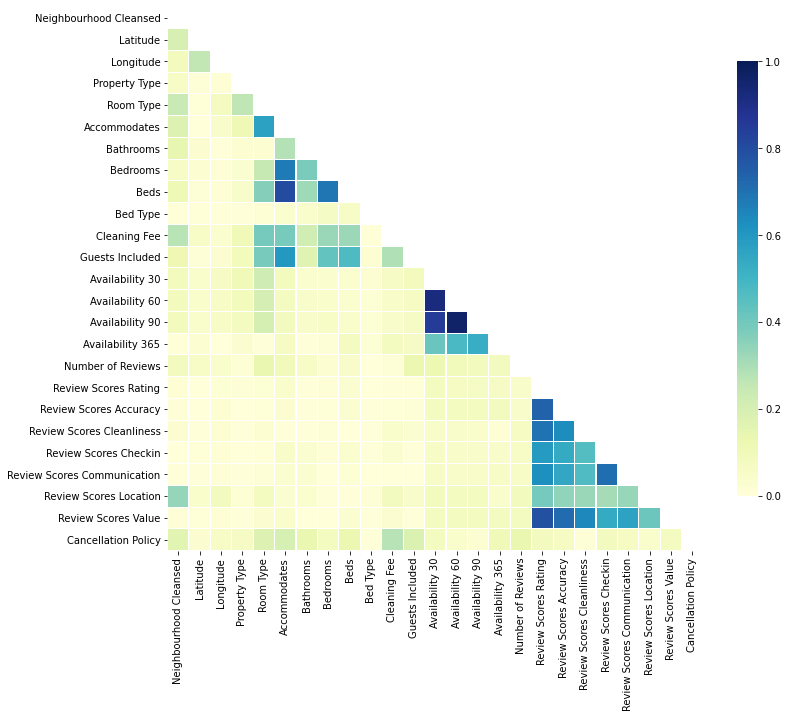

In [71]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_train_f.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

<div class="alert alert-success">
    <center>
<b> Representación (scatter_plot)</b> 
    </center>
</div>

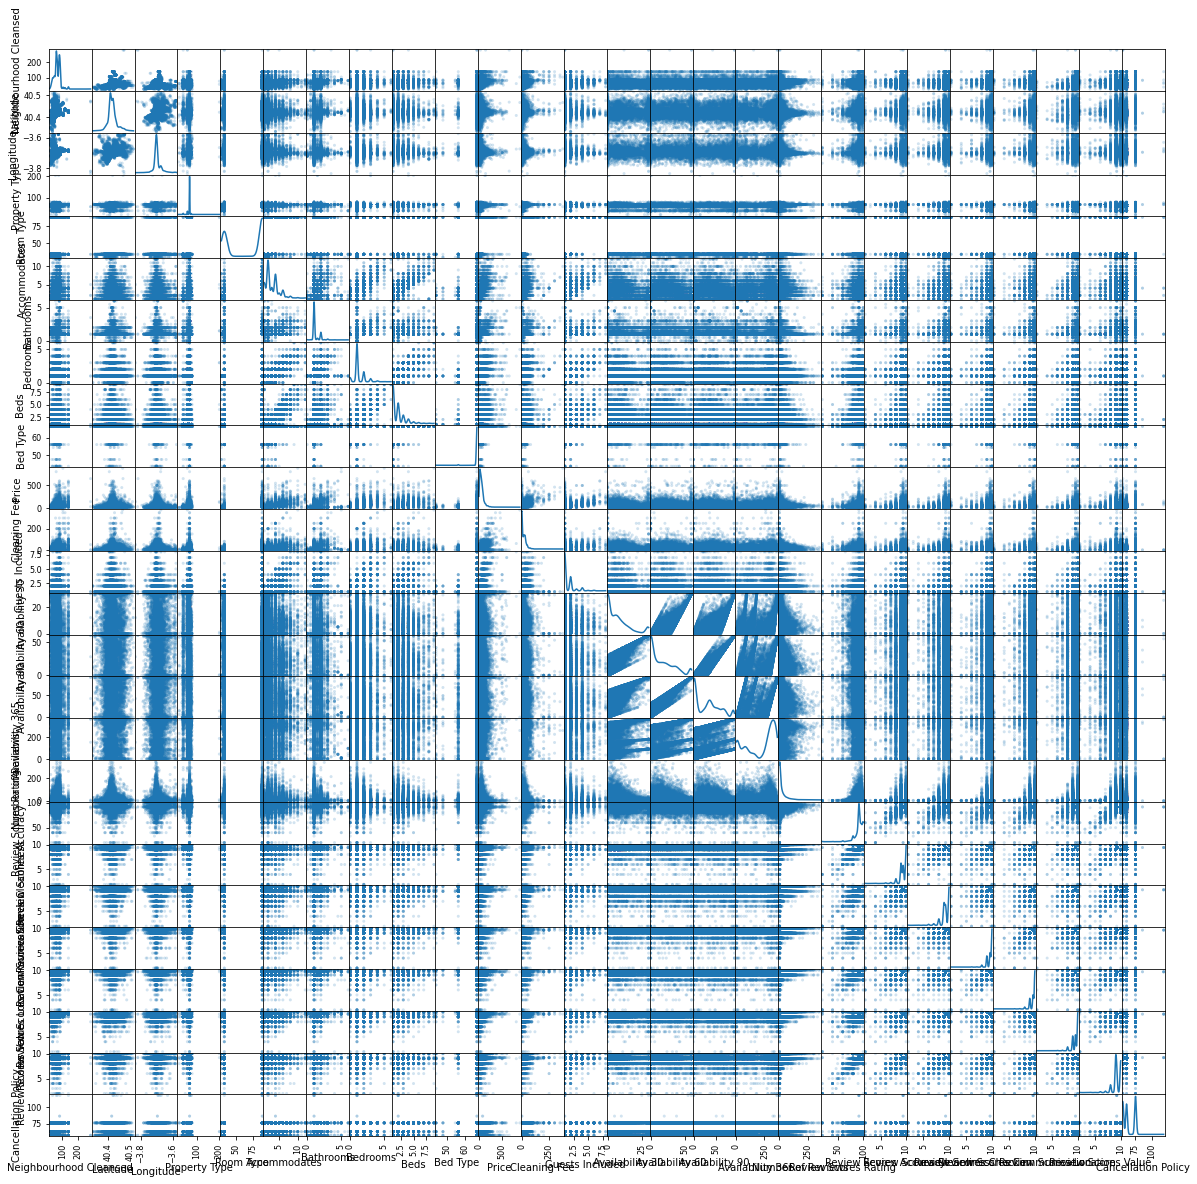

In [72]:
pd.plotting.scatter_matrix(airbnb_train_f, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [ ]:
#Observando la matriz me encuentro con unas variables que tienen alta correlación 
#por lo que voy a proceder a eliminarlas ya que me puedo quedar con una de ellas de tal forma que 
# nuestro modelo no caiga en redundancia y overfitting

#Accommodates, beds y bedrooms tienen alta correlación por lo que eliminaré beds
#Availability 60, Availability 90, Availability 365 tienen alta correlación por lo que las elimino y me quedo con
#Availability 30

#Review Scores Value, Review Scores Location, Review Scores Accuracy, Review Scores Cleanliness
#Review Scores Checkin y Review Scores Communication tienen alta correlación, lqas elimino y me quedo con 
#Review Scores Rating


In [73]:
airbnb_train_f = airbnb_train_f.drop(['Bedrooms','Review Scores Value', 'Review Scores Location', 'Review Scores Accuracy', 
                                'Review Scores Cleanliness','Review Scores Checkin', 'Review Scores Communication',
                               'Availability 60', 'Availability 90', 'Availability 365', 'Beds'],
                               axis=1)

<ipython-input-74-e724ef7e3772>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


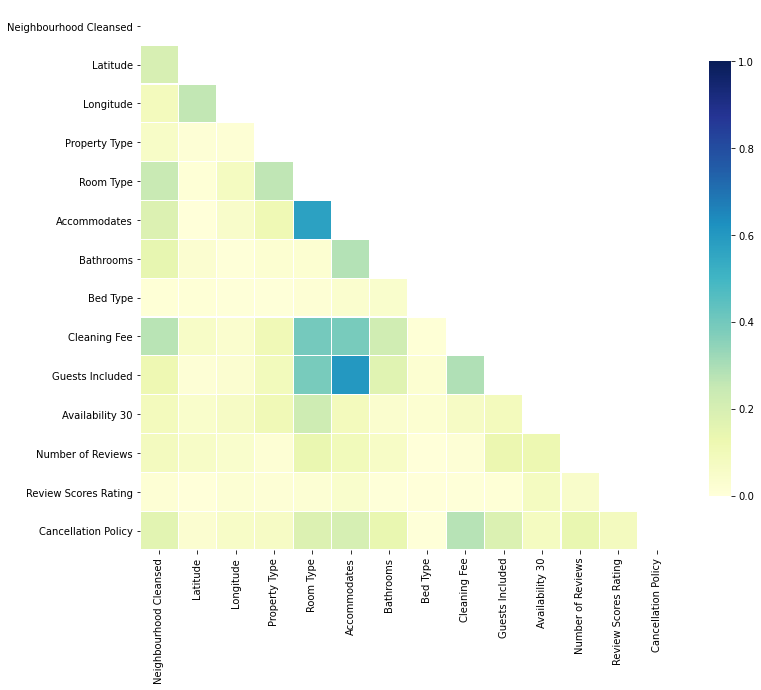

In [74]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_train_f.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [ ]:
#'Guests Included' y 'Accommodates' tienen mucha relación pero no las eliminaré porque quedaría quizás muy pequeño
#El dataset y además aún no conozco la importancia de estas variables. 
#Accommodates' y 'Room Type' son variables que a simple vista no hubiese pensado que tienen relación sin embargo
#Es posible que la cantidad de huespedes tenga relación por el tamaño de las habitaciones. Estas variables
#Las considero importantes por lo que no las eliminaré

In [75]:
airbnb_train_f.columns

Index(['Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bed Type', 'Price',
       'Cleaning Fee', 'Guests Included', 'Availability 30',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy'],
      dtype='object')

In [76]:
print(f'Dimensiones del Dataset de Train: {airbnb_train_f.shape}')

Dimensiones del Dataset de Train: (10437, 15)


<div class="alert alert-success">
    <center>
<b> División X, Y a Train</b> 
    </center>
</div>

In [77]:
#Haré la división X y Y para probar distintos modelos guardando las variables en un nuevo Dataset para realizar 
#diferentes pruebas 

In [78]:
#Movemos la variable Price a la primera posición 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

data_train = airbnb_train_f

X_train = data_train.drop(['Price'], axis=1)
y_train = data_train['Price']

# Escalamos con los datos de Train
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

Best mean cross-validation score: -1373.677
Best parameters: {'alpha': 0.18329807108324356}


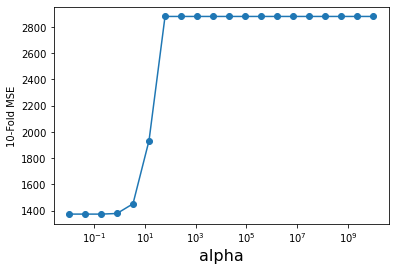

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-2, 10, 20)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)

print('Best mean cross-validation score: {:.3f}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))

scores = -1 * np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha', fontsize=16)
plt.ylabel('10-Fold MSE')

plt.show()

<div class="alert alert-success">
    <center>
<b> Carga de los datos de Test</b> 
    </center>
</div>

In [82]:
# Cargamos el dataset de TEST 
airbnb_test = pd.read_csv('./data/test.csv', sep=';', decimal='.')

In [83]:
airbnb_test = airbnb_test[airbnb_test['City']=='Madrid']
#Elimino variables
airbnb_test = airbnb_test.drop(['City', 'State', 'Country Code', 'Country', 'Market', 'Smart Location', 
                            'Neighbourhood', 'Neighbourhood Group Cleansed', 'Experiences Offered','Space', 
                            'Host Acceptance Rate', 'Host Neighbourhood', 'Has Availability', 'First Review',
                            'Last Review', 'Host Listings Count', 'Host Total Listings Count','License', 
                            'Weekly Price','Monthly Price', 'Jurisdiction Names','Maximum Nights', 
                            'Reviews per Month','Minimum Nights', 'Extra People',
                            'Calculated host listings count', 'Zipcode', 'Square Feet', 'Security Deposit'], axis=1)

In [84]:
Variables_Categoricas = ['Neighbourhood Cleansed','Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']

mean_m = {}
for i in Variables_Categoricas:
    mean = airbnb_test.groupby(i)['Price'].mean()
    airbnb_test[i] = airbnb_test[i].map(mean)
    mean_m[i] = mean

In [85]:
airbnb_test_2 = airbnb_test[airbnb_test['Bedrooms'] <= 6]
airbnb_test_3 = airbnb_test_2[airbnb_test_2['Beds'] <= 9]
airbnb_test_4 = airbnb_test_3[airbnb_test_3['Accommodates'] <= 12]
#airbnb_test_5 = airbnb_test_4[airbnb_test_4['Cleaning Fee'] <= 350]
airbnb_test_5 = airbnb_test_4[airbnb_test_4['Guests Included'] <= 8]
airbnb_test_6 = airbnb_test_5[airbnb_test_5['Price'] >=12 & (airbnb_test_5['Price'] <800)]
airbnb_test_f = airbnb_test_6

In [89]:
#Hice este paso divivido porque me daba error y no supe como corregirlo :( prefiero seguir avanzando
airbnb_test_f['Bathrooms'].fillna(airbnb_test_f['Bathrooms'].mean(),inplace=True)

In [87]:
airbnb_test_f['Bedrooms'].fillna(airbnb_test_f['Bedrooms'].mean(), inplace=True)

In [88]:
airbnb_test_f['Review Scores Rating'].fillna(airbnb_test_f['Review Scores Rating'].mean(), inplace=True)

In [90]:
airbnb_test_f['Beds'].fillna(airbnb_test_f['Beds'].mean(), inplace=True)

In [91]:
airbnb_test_f['Price'].fillna(airbnb_test_f['Price'].mean(), inplace=True)

In [92]:
#Los valores nulos de 'Cleaning Fee' se sustituyen por el valor 0
airbnb_test_f['Cleaning Fee'].fillna(0, inplace=True)

In [93]:
airbnb_test_f = airbnb_test_f.drop(['Bedrooms','Review Scores Value', 'Review Scores Location', 'Review Scores Accuracy', 
                                'Review Scores Cleanliness','Review Scores Checkin', 'Review Scores Communication',
                               'Availability 60', 'Availability 90', 'Availability 365', 'Beds'],
                               axis=1)

In [94]:
print(f'Dimensiones del Dataset de Train: {airbnb_train_f.shape}')
print(f'Dimensiones del Dataset de Test: {airbnb_test_f.shape}')

Dimensiones del Dataset de Train: (10437, 15)
Dimensiones del Dataset de Test: (2607, 15)


<div class="alert alert-success">
    <center>
<b>División X Y a Test
   </b> 
    </center>
</div>

In [95]:
airbnb_test_f.columns

Index(['Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bed Type', 'Price',
       'Cleaning Fee', 'Guests Included', 'Availability 30',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy'],
      dtype='object')

In [96]:
airbnb_test_f=airbnb_test_f[['Price']+[c for c in airbnb_test_f if c not in ['Price']]]
airbnb_test_f.columns

Index(['Price', 'Neighbourhood Cleansed', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bed Type',
       'Cleaning Fee', 'Guests Included', 'Availability 30',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy'],
      dtype='object')

In [101]:
#Usé este código porque el otro me daba error
data_test = airbnb_test_f

# Escalado
y_test = data_test['Price']     # nos quedamos con la objetivo, price
X_test = data_test.loc[:, data_test.columns != 'Price']      # nos quedamos con el resto

feature_names_test = data_test.columns[data_test.columns!='Price']

# Normalización/escalado con los datos de training
XtestScaled = scaler.transform(X_test)

<div class="alert alert-success">
    <center>
<b> Lasso
   </b> 
    </center>
</div>

In [102]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)

mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

R2TrainModelLasso = lasso.score(XtrainScaled,y_train)
R2TestModelLasso = lasso.score(XtestScaled,y_test)

print('MSE Modelo Lasso (Train): %0.5g' % mseTrainModelLasso)
print('MSE Modelo Lasso (Test) : %0.5g' % mseTestModelLasso + '\n')

print('R^2 Modelo Lasso (Train): %0.5g' % R2TrainModelLasso)
print('R^2 Modelo Lasso (Test) : %0.5g' % R2TestModelLasso)

MSE Modelo Lasso (Train): 1367.3
MSE Modelo Lasso (Test) : 1301.2

R^2 Modelo Lasso (Train): 0.52527
R^2 Modelo Lasso (Test) : 0.50941


<div class="alert alert-success">
    <center>
<b>
   </b> 
    </center>
</div>

best mean cross-validation score: -1373.906
best parameters: {'alpha': 61.584821106602604}


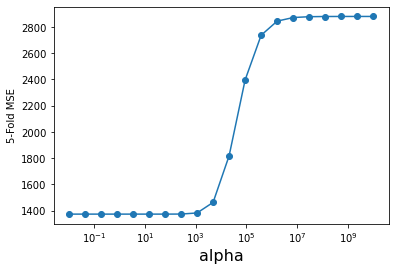

In [103]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_vector = np.logspace(-2,10,20)
# ...
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [116]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']#*10
ridge = Ridge(alpha = alpha_optimo).fit(XtrainScaled,y_train)
feature_names = X_train.columns

ytrainRidge = ridge.predict(XtrainScaled)
ytestRidge  = ridge.predict(XtestScaled)
mseTrainModelRidge = mean_squared_error(y_train,ytrainRidge)
mseTestModelRidge = mean_squared_error(y_test,ytestRidge)

print('MSE Modelo Ridge (train): %0.5g' % mseTrainModelRidge)
print('MSE Modelo Ridge (test) : %0.5g' % mseTestModelRidge)

print('RMSE Modelo Ridge (train): %0.5g' % np.sqrt(mseTrainModelRidge))
print('RMSE Modelo Ridge (test) : %0.5g' % np.sqrt(mseTestModelRidge))

w = ridge.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Ridge (train): 1367
MSE Modelo Ridge (test) : 1301.2
RMSE Modelo Ridge (train): 36.972
RMSE Modelo Ridge (test) : 36.073
Neighbourhood Cleansed 9.646161051902778
Latitude -0.12022571630182587
Longitude 0.4210178254105788
Property Type -0.08058458507387106
Room Type 11.514004094546074
Accommodates 16.592639898148807
Bathrooms 9.024513509982633
Bed Type 0.8571490339393899
Cleaning Fee 13.168668708934327
Guests Included -0.04166717850987015
Availability 30 6.710438245362223
Number of Reviews -3.9439372154807337
Review Scores Rating 3.399555673522952
Cancellation Policy -2.6295727190017963


In [ ]:
#Este resultado es bastante malo. El error medio obtenido en el subconjunto de entrenamiento es de 36.97 
#y en el de test de 36.07. Continuamos realizando pruebas

<div class="alert alert-success">
    <center>
<b>Lasso
   </b> 
    </center>
</div>

best mean cross-validation score: -1373.710
best parameters: {'alpha': 0.07196856730011521}


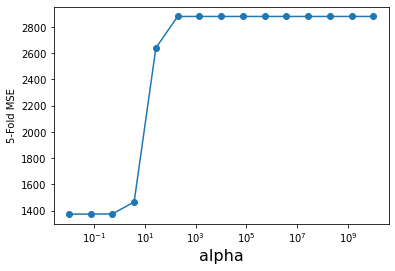

In [118]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alpha_vector = np.logspace(-2,10,15)
# ...
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [119]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)
feature_names = X_train.columns

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)

mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.5g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.5g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.5g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.5g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1367
MSE Modelo Lasso (test) : 1301.1
RMSE Modelo Lasso (train): 36.973
RMSE Modelo Lasso (test) : 36.07
Neighbourhood Cleansed 9.557227549566779
Latitude -0.0
Longitude 0.3171372507555873
Property Type -0.0
Room Type 11.397059384544933
Accommodates 16.562915780960115
Bathrooms 8.96163967065931
Bed Type 0.788572073836833
Cleaning Fee 13.131245600714779
Guests Included 0.0
Availability 30 6.622011937266961
Number of Reviews -3.8750497392164007
Review Scores Rating 3.327355511383409
Cancellation Policy -2.5344368826298123


In [ ]:
#No hay casi cambios, los errores son casi exactos. Lasso no nos ha eliminado variables por lo que parece que son
#Relevantes para la predicción del precio.
#Para mejorar estos modelos sería ideal crear nuevas variables a partir de las existentes. 
#Los valores obtenidos de las variables nos dan una idea de cuáles podríamos descartar/o utilizar.

In [ ]:
for f,wi in zip(feature_names,w):
    if wi < 1:
        print(f,wi)

<div class="alert alert-success">
    <center>
<b>Random Forest
   </b> 
    </center>
</div>

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=2; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   0.9s
[CV] END ........................................max_depth=2; total time=   1.0s
[CV] END ........................................max_depth=3; total time=   1.3s
[CV] END .......................................

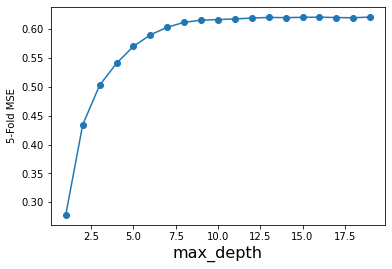

In [120]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(RandomForestRegressor(n_estimators=200, random_state=0), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [121]:
#maxDepthOptimo = grid.best_params_['max_depth']
maxDepthOptimo = 8 #Establezco este valor porque creo que puede aportar mejores resultados con una menor complejidad
rf = RandomForestRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",rf.score(X_train,y_train))
print("Test: ",rf.score(X_test,y_test))

Train:  0.7591634848560193
Test:  0.611415233496359


In [ ]:
#Tenemos muchisima diferencia entre Train y Test. Estamos en overfitting

<div class="alert alert-success">
    <center>
<b>Conocemos la Importancia de las Variables
   </b> 
    </center>
</div>

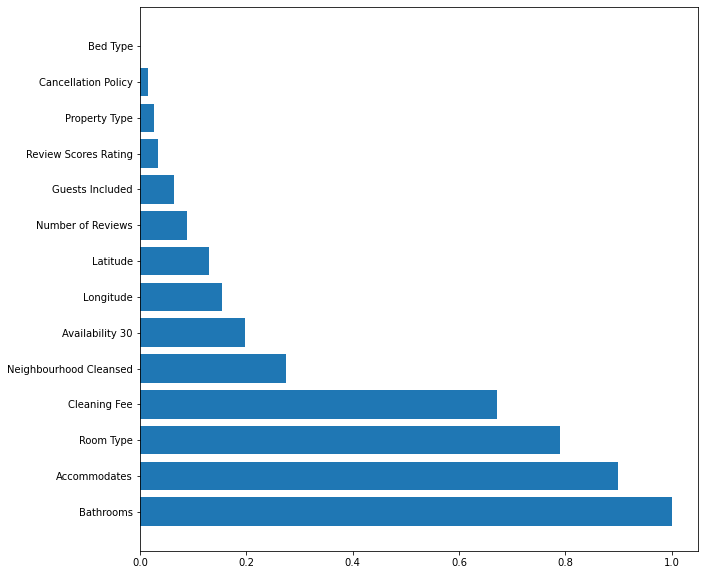

In [122]:
imp_variables = rf.feature_importances_
imp_variables = imp_variables / np.max(imp_variables)

indices = np.argsort(imp_variables)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),imp_variables[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

<div class="alert alert-success">
    <center>
<b>Boosting Regressor
   </b> 
    </center>
</div>


In [129]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [50,100,150,350]
learningRate = [0.1,0.01]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=2), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.4s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.7s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.7s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.7s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.7s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.7s
[CV] END ................learning_rate=0.1, n_estimators=150; total time=   1.0s
[CV] END ................learning_rate=0.1, n_est

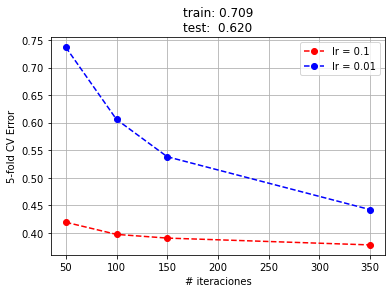

In [130]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=2,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [ ]:
#Aumento el número de iteraciones y la complejidad del arbol. max_depth=3

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [100,200,400,800]
learningRate = [0.01,0.1]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.0s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   1.9s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   1.9s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   1.9s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   1.9s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   1.9s
[CV] END ...............learning_rate=0.01, n_estimators=400; total time=   3.9s
[CV] END ...............learning_rate=0.01, n_est

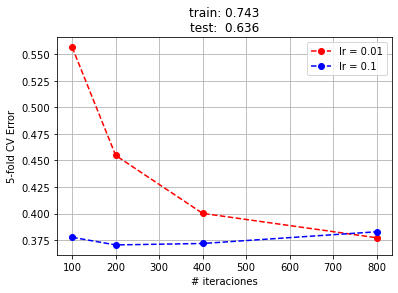

In [132]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

El Resultado obtenido para test con Gradient Boosting Regressor es de 0,636. Mejoró solo 0,16 en comparación con el anterior. Tiene un mejor comportamiento la curva con Learning Rate de 0.01
Vamos a conocer ahora la iportancia de las variables:

<div class="alert alert-success">
    <center>
<b>Importancia de las Variables
   </b> 
    </center>
</div>


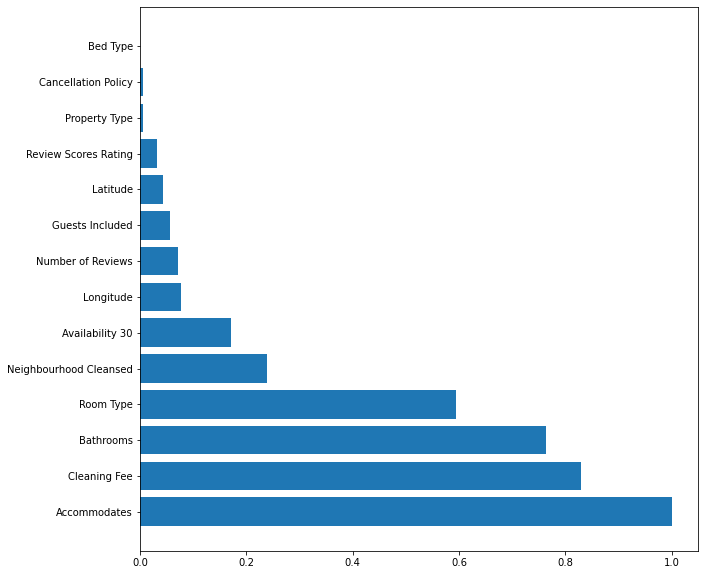

In [133]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

<div class="alert alert-success">
    <center>
<b>SVM
   </b> 
    </center>
</div>


In [134]:
from sklearn.svm import SVR

vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
grid.fit(XtrainScaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             verbose=1)

best mean cross-validation score: 0.604
best parameters: {'C': 100.0, 'gamma': 0.026826957952797246}


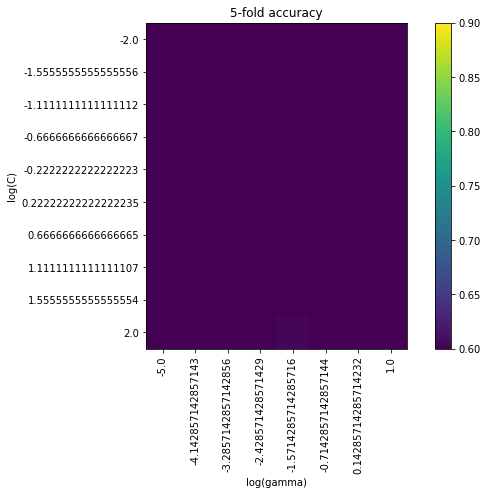

In [135]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [136]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))

Acc (TEST): 0.59


In [ ]:
#Como ya había ejecutado anteriormente este modelo en otro notebook de copia con otros parámetros, 
#haré un "zoom" para ver si consigo mejor resultado. 

#Captura de pantalla de una prueba anterior que dió mejor resultado.

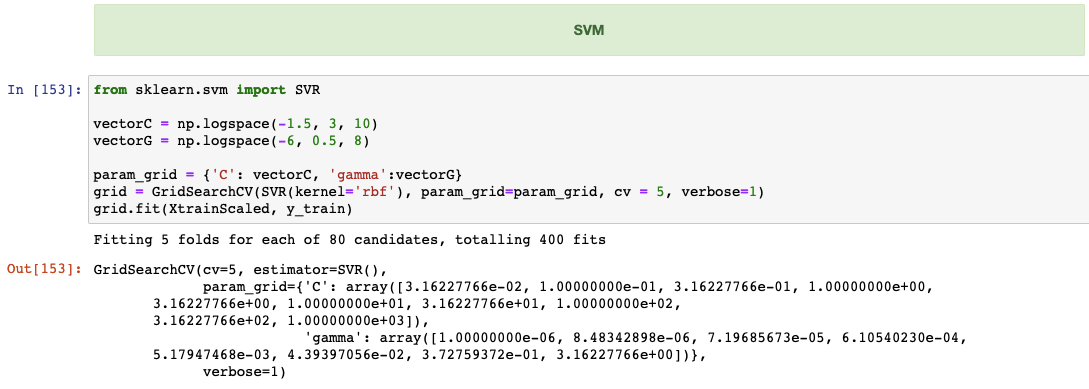

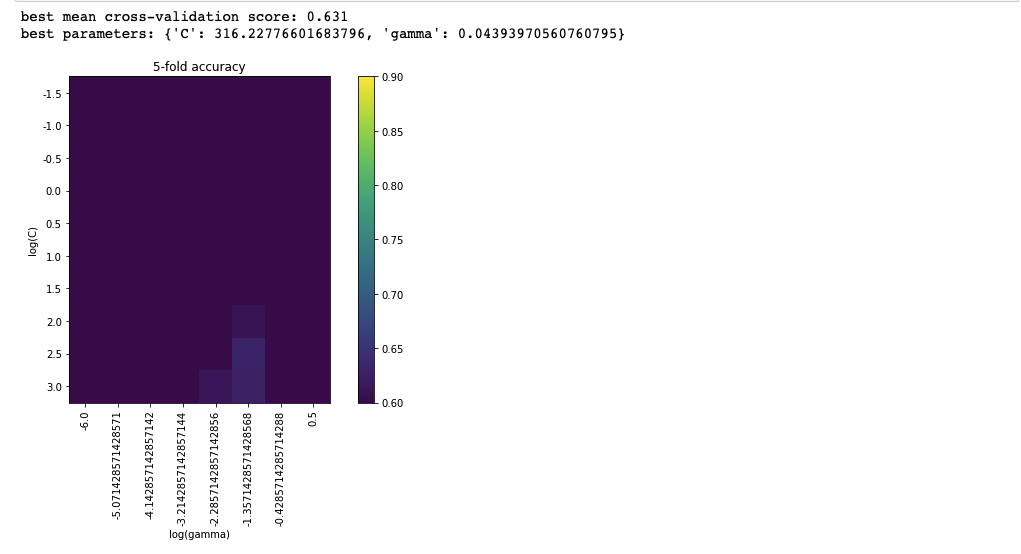

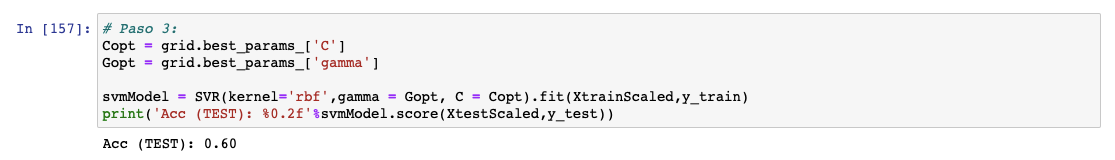

In [ ]:
#No me dio tiempo terminar la ejecusión del "zoom" del SVM Me quedo con estos datos

<div class="alert alert-success">
    <center>
<b>Conclusiones
   </b> 
    </center>
</div>

RIDGE:
RMSE Modelo Ridge (train): 36.972
RMSE Modelo Ridge (test) : 36.073

LASSO:
R^2 Modelo Lasso (Train): 0.52527
R^2 Modelo Lasso (Test) : 0.50941
RMSE Modelo Lasso (train): 36.973
RMSE Modelo Lasso (test) : 36.07

Random Forest
Train:  0.7591634848560193
Test:  0.611415233496359

GradientBoostingRegressor:
Train:  0.743
Test:  0.636

SVM:
Acc (TEST): 0.59

Teniendo en cuenta que la media de nuestra variable objetivo es de 73,71€ el modelo que mejor resultado tuvo 
para test es Boosting Regressor con 0.636. El siguiente mejor resultado fue Random forest con 0,61. 

Por los resultados obtenidos podemos decir que el modelo tiene overfitting.

<div class="alert alert-success">
    <center>
<b>Mejoras
   </b> 
    </center>
</div>

Por motivos de tiempo no ha sido posible realizar nuevas pruebas y modificaciones. 
Sin embargo se proponen las siguientes mejoras:

Analizar la variable Precio para saber si era necesaiario realizar un mejor filtrado de los outliers.

Crear nuevas variables con las ya existentes: como por ejemplo la suma de Precio y Cleaning Fee. Bathrooms, beds y bedrooms. La media entre las variables de Reviews. 

Incluir la variable de Experiences Offered

Incluir otros datasets para tener nuevas variables como Museos cercanos, paradas de metro y distancia del aeropuerto para enriquecer el dataset.